# Day 3 
- reading and saving data with numpy
- plotting data:
    - plt.plot
    - plt.scatter
    - plt.hist
    - ...
- plotting images
    - plt.imshow
    - plt.contour
    - ...
- arrays of plots
- 3d plotting?

## Loading and saving data with numpy

In [1]:
import numpy as np

In [3]:
A = np.random.rand(3)
A

array([0.50729144, 0.61443189, 0.99083021])

In [5]:
A = np.array([1,2,3,6,4])
A

array([1, 2, 3, 6, 4])

In [14]:
T = 10 # s
dt = 0.1
t = np.arange(0,T,dt)
Nt = len(t)
data1 = np.exp(t)
data2 = 100*t**2

In [15]:
np.savetxt('time.txt',t,fmt='%.3f',header = 'time (s)')

In [21]:
dataset = np.array([t,data1,data2]).T
dataset.shape

(100, 3)

In [22]:
np.savetxt('dataset.txt',dataset,fmt='%.3f',delimiter = '\t\t',
           header = 'time (s)\tf1\tf2')

I can also save a csv actually

In [23]:
np.savetxt('dataset.csv',dataset,fmt='%.3f',delimiter = ',',
           header = 'time (s),f1,f2')

## Loading

In [36]:
raw_data = np.loadtxt('dataset.txt')

t = raw_data[:,0]

# Save each column in a dictionary
data = {}
data['t'] = raw_data[:,0]
data['data1'] = raw_data[:,1]
data['data2'] = raw_data[:,2]

# # Loop instead of going one by one (equivalent above)
# for i in range(1,3):
#     f[i] = A[:,i]

In [37]:
for label in data:
    print(label)

t
data1
data2


### alternative to write and save files is pickle

To open matlab files we can do it
- Through scipy with a function called loadmat
- Another option is h5py (a little unintuitive)

# Visualizing data

In [34]:
import matplotlib.pyplot as plt

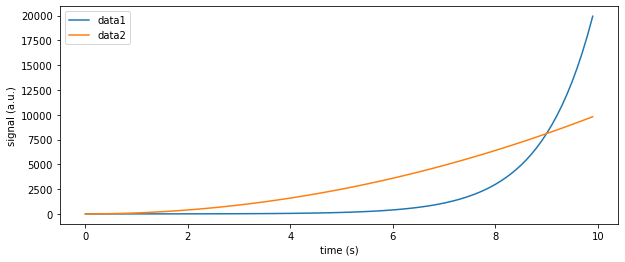

In [55]:
plt.figure(figsize=(10,4))

plt.plot(data['t'],data['data1'],label='data1')
plt.plot(data['t'],data['data2'],label='data2')

plt.xlabel('time (s)')
plt.ylabel('signal (a.u.)')

plt.legend()

plt.show()

If we want the data on different plots we can restart initializing the figure

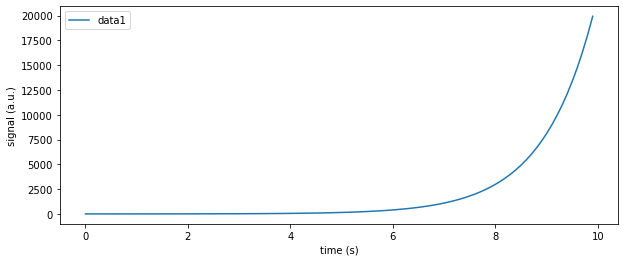

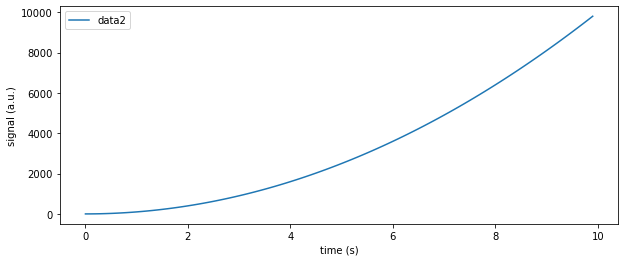

In [56]:
plt.figure(figsize=(10,4))

plt.plot(data['t'],data['data1'],label='data1')

plt.xlabel('time (s)')
plt.ylabel('signal (a.u.)')

plt.legend()

plt.show()

plt.figure(figsize=(10,4))

plt.plot(data['t'],data['data2'],label='data2')

plt.xlabel('time (s)')
plt.ylabel('signal (a.u.)')

plt.legend()

plt.show()

But... We are going to see how to do this properly with subplots

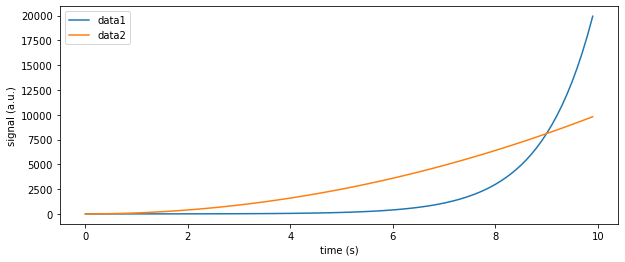

In [57]:
plt.figure(figsize=(10,4))

for label in ['data1','data2']:
    plt.plot(data['t'],data[label],label=label)

plt.xlabel('time (s)')
plt.ylabel('signal (a.u.)')

plt.legend()

plt.show()

Changing the style of the figure

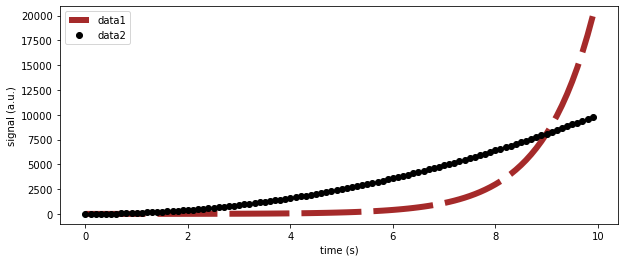

In [88]:
plt.figure(figsize=(10,4))

plt.plot(data['t'],data['data1'],label='data1',
         color = 'brown',linewidth=6,linestyle=(0,(10,2))
        )
plt.plot(data['t'],data['data2'],'o',color=(0,0,0),label='data2')

plt.xlabel('time (s)')
plt.ylabel('signal (a.u.)')

plt.legend()

plt.show()

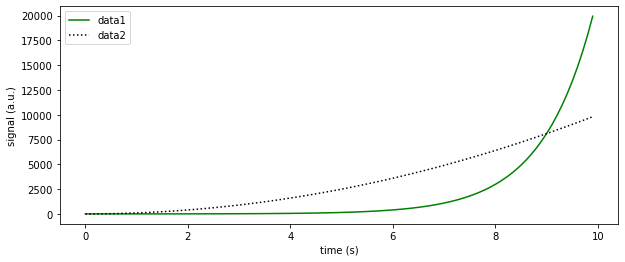

In [89]:
style_dictionary = {'data1':'g-','data2':'k:'}

plt.figure(figsize=(10,4))

for label in ['data1','data2']:
    plt.plot(data['t'],data[label],style_dictionary[label],label=label)

plt.xlabel('time (s)')
plt.ylabel('signal (a.u.)')

plt.legend()

plt.show()

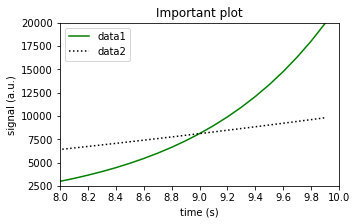

In [103]:
style_dictionary = {'data1':'g-','data2':'k:'}

plt.figure(figsize=(5,3))

for label in ['data1','data2']:
    plt.plot(data['t'],data[label],style_dictionary[label],label=label)

plt.xlabel('time (s)')
plt.ylabel('signal (a.u.)')

plt.title('Important plot')

plt.xlim([8,10])
plt.ylim([2500,20000])

plt.xticks(np.arange(8,10.2,0.2))

plt.legend()

plt.show()

## Subplots or multiple plots

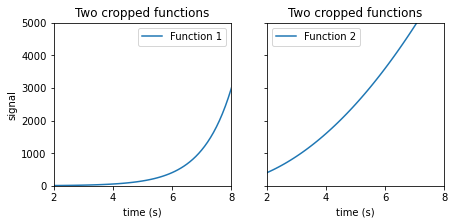

In [159]:
fig, axarr = plt.subplots(ncols=2,nrows=1,figsize=(7,3),sharey=True)
# figure is the overall, axarr is an array containing all the subplots axes


# axarr[1].plot(t,f[1], label = 'Exp')
# axarr[2].plot(t,f[2], label = 'Quad')

for i in range(2):
    
    axarr[i].plot(t,f[i+1], label = 'Function {}'.format(i+1))

    axarr[i].set_xlabel('time (s)')

    axarr[i].legend()

    axarr[i].set_xlim([2,8])
    axarr[i].set_ylim([0,5000])

    axarr[i].set_title('Two cropped functions')

    
axarr[0].set_ylabel('signal')

plt.show()

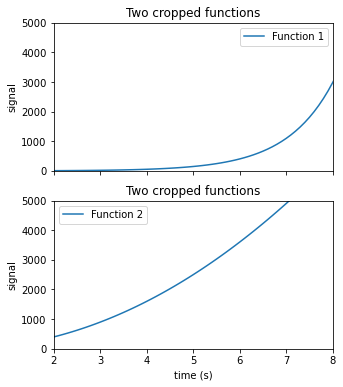

In [164]:
fig, axarr = plt.subplots(ncols=1,nrows=2,figsize=(5,6),sharex=True)
# figure is the overall, axarr is an array containing all the subplots axes

for i in range(2):
    
    axarr[i].plot(t,f[i+1], label = 'Function {}'.format(i+1))
    
    axarr[i].set_ylabel('signal')

    axarr[i].legend()

    axarr[i].set_xlim([2,8])
    axarr[i].set_ylim([0,5000])

    axarr[i].set_title('Two cropped functions')

axarr[-1].set_xlabel('time (s)')

plt.show()

In [166]:
# The pylab feature

In [167]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\Users\deangelis\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [171]:
plt.figure(figsize = (5,3))

plt.plot(t,f[1], label = 'Exp')
plt.plot(t,f[2], label = 'Quad')

plt.xlabel('time (s)')
plt.ylabel('signal')

plt.legend()

plt.xlim([2,8])
plt.ylim([0,5000])

plt.title('Two cropped functions')

plt.show()

In [172]:
%matplotlib inline

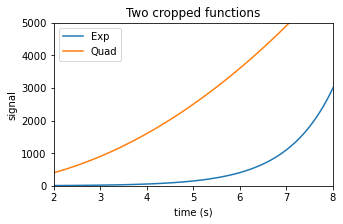

In [176]:
plt.figure(figsize = (5,3))

plt.plot(t,f[1], label = 'Exp')
plt.plot(t,f[2], label = 'Quad')

plt.xlabel('time (s)')
plt.ylabel('signal')

plt.legend()

plt.xlim([2,8])
plt.ylim([0,5000])

plt.title('Two cropped functions')


plt.savefig('my_figure.pdf', fmt ='pdf', dpi = 600)

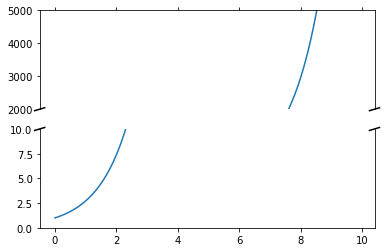

In [186]:
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# plot the same data on both axes
ax.plot(t,f[1])
ax2.plot(t,f[1])

# zoom-in / limit the view to different portions of the data
ax.set_ylim(2000, 5000)  # outliers only
ax2.set_ylim(0, 10)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()


d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

## Plotting images

In [201]:
A = np.random.rand(300,300)

# A = np.zeros((50,50))
# A[:10] = 1

In [208]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\Users\deangelis\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [209]:
plt.imshow(A, cmap = 'jet', extent = [0,1,0,1])
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.colorbar()

## other plotting function

In [210]:
data = np.random.normal(3,2,100)

In [214]:
plt.hist(data, bins = 20)
plt.show()

In [215]:
plt.hist(data, bins = np.arange(0,100,1))
plt.show()